Test metrics: Accuracy=0.7411, Precision=0.5504, Recall=0.0914, Fscore=0.1568
Validation metrics: Accuracy=0.7413, Precision=0.5417, Recall=0.0918, Fscore=0.1570


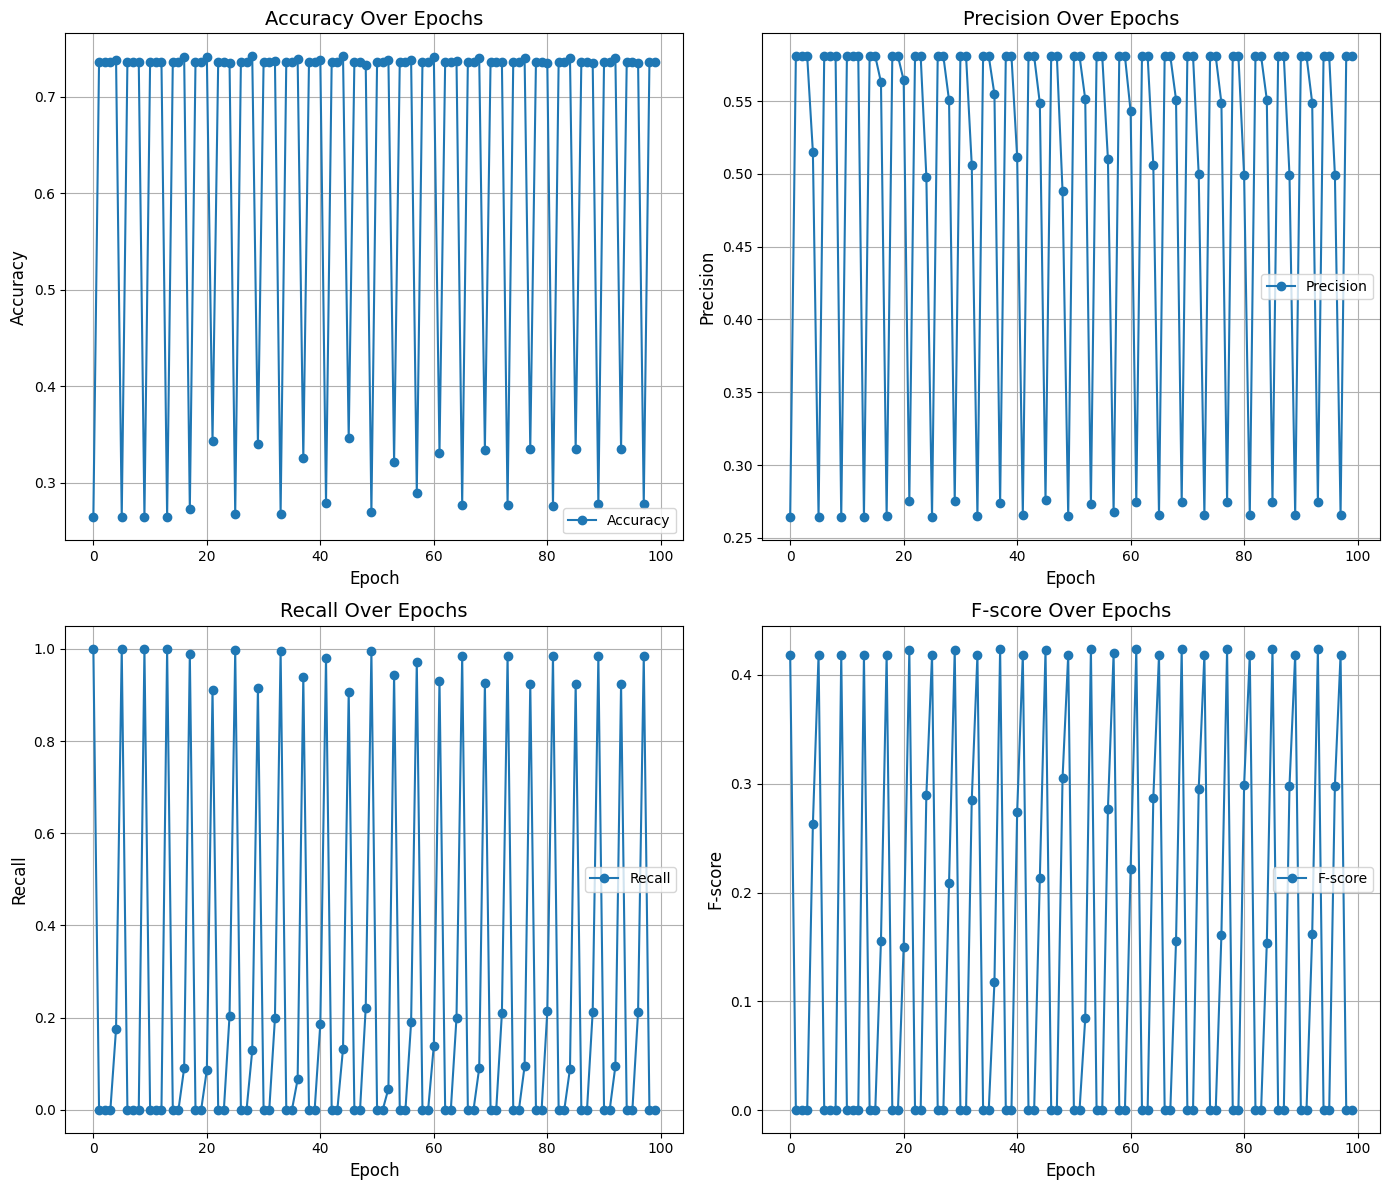

In [ ]:

# О.4.1. и O.4.3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Функция для разделения данных на тренировочную и тестовую выборки
def split_train_test(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

# Функция для разделения данных на тренировочную, валидационную и тестовую выборки
def split_train_test_val(X, y, test_size=0.2, val_size=0.2):
    # Первое разделение: тренировочная выборка и временная выборка (валидация + тест)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size + val_size, random_state=42)
    val_size_adjusted = val_size / (test_size + val_size)  # Корректировка размера валидации
    # Второе разделение: временная выборка на валидационную и тестовую
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1 - val_size_adjusted, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Функция для обучения модели 
def train_model(X_train, y_train, epochs=100, learning_rate=0.1):
    vector_w = [1000] * 10  # Начальные веса
    results = []

    for epoch in range(epochs):
        vector_errors = []
        labels = []

        # Проходим по всем примерам обучающей выборки
        for i in range(len(X_train)):
            temp = np.dot(X_train[i], vector_w)
            predicted_label = 1 if temp >= 0 else 0
            labels.append(predicted_label)
            vector_errors.append(y_train[i] - predicted_label)

        # Обновление весов
        delta = [0] * 10
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                delta[j] += vector_errors[i] * learning_rate * X_train[i][j]

        for i in range(10):
            vector_w[i] = vector_w[i] + delta[i]

        # Вычисляем TP, TN, FP, FN
        TP = sum((labels[i] == 1 and y_train[i] == 1) for i in range(len(labels)))
        TN = sum((labels[i] == 0 and y_train[i] == 0) for i in range(len(labels)))
        FP = sum((labels[i] == 1 and y_train[i] == 0) for i in range(len(labels)))
        FN = sum((labels[i] == 0 and y_train[i] == 1) for i in range(len(labels)))

        N = len(X_train)
        accuracy = (TP + TN) / N
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        Fscore = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        # Сохраняем метрики для графиков
        results.append({
            'Epoch': epoch,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Fscore': Fscore
        })

        # Сохраняем результаты текущей эпохи в файл
        with open('epoh1.txt', 'a') as f:
            f.write(f'Эпоха {epoch} ------------------------------------\n')
            f.write(f'accuracy = {accuracy:.4f}\n')
            f.write(f'precision = {precision:.4f}\n')
            f.write(f'recall = {recall:.4f}\n')
            f.write(f'Fscore = {Fscore:.4f}\n\n')

    return vector_w, results

# Построение графиков метрик
def plot_metrics(results):
    epochs = [result['Epoch'] for result in results]
    metrics = {
        'Accuracy': [result['Accuracy'] for result in results],
        'Precision': [result['Precision'] for result in results],
        'Recall': [result['Recall'] for result in results],
        'F-score': [result['Fscore'] for result in results],
    }

    plt.figure(figsize=(14, 12))

    for i, (metric_name, metric_values) in enumerate(metrics.items(), 1):
        plt.subplot(2, 2, i)  # Сетка 2x2 для 4 графиков
        plt.plot(epochs, metric_values, label=metric_name, marker='o')
        plt.title(f'{metric_name} Over Epochs', fontsize=14)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel(metric_name, fontsize=12)
        plt.grid(True)
        plt.legend(fontsize=10)

    plt.tight_layout()  # Подгонка расстояний между графиками
    plt.show()

# Функция для вычисления метрик на тестовой выборке
def calculate_metrics(X, y, vector_w):
    labels = []
    for nums in X:
        temp = np.dot(nums, vector_w)  # Скалярное произведение весов и признаков
        predicted_label = 1 if temp >= 0 else 0  # Прогноз
        labels.append(predicted_label)

    # Вычисляем TP, TN, FP, FN
    TP = sum((labels[i] == 1 and y[i] == 1) for i in range(len(labels)))
    TN = sum((labels[i] == 0 and y[i] == 0) for i in range(len(labels)))
    FP = sum((labels[i] == 1 and y[i] == 0) for i in range(len(labels)))
    FN = sum((labels[i] == 0 and y[i] == 1) for i in range(len(labels)))

    N = len(X)
    accuracy = (TP + TN) / N 
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0  
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0  
    Fscore = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return accuracy, precision, recall, Fscore

df = pd.read_csv('../september/result/september.csv')

# Инициализация массива для хранения числовых значений из столбца 'text'
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

# Инициализация вектора меток (0 или 1) на основе значения 7-го параметра из 'emotion_scores'
vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

X = array  # Признаки
y = vector_accuracy  # Метки

X_train, X_test, y_train, y_test = split_train_test(X, y)  # Тренировочная и тестовая выборки
X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(X, y)  # Тренировочная, валидационная и тестовая выборки

# Обучение модели
vector_w, results = train_model(X_train, y_train, epochs=100, learning_rate=0.1)

# Оценка на тестовой выборке
accuracy_test, precision_test, recall_test, Fscore_test = calculate_metrics(X_test, y_test, vector_w)
print(f'Test metrics: Accuracy={accuracy_test:.4f}, Precision={precision_test:.4f}, Recall={recall_test:.4f}, Fscore={Fscore_test:.4f}')

# Оценка на валидационной выборке
accuracy_val, precision_val, recall_val, Fscore_val = calculate_metrics(X_val, y_val, vector_w)
print(f'Validation metrics: Accuracy={accuracy_val:.4f}, Precision={precision_val:.4f}, Recall={recall_val:.4f}, Fscore={Fscore_val:.4f}')

# Сохранение результатов обучения в CSV
results_df = pd.DataFrame(results)
results_df.to_csv('./ignore/results_analysis.csv', index=False)


plot_metrics(results)


Test metrics: Accuracy=0.7363, Precision=0.3750, Recall=0.0001, Fscore=0.0003
Validation metrics: Accuracy=0.7363, Precision=0.6364, Recall=0.0003, Fscore=0.0006


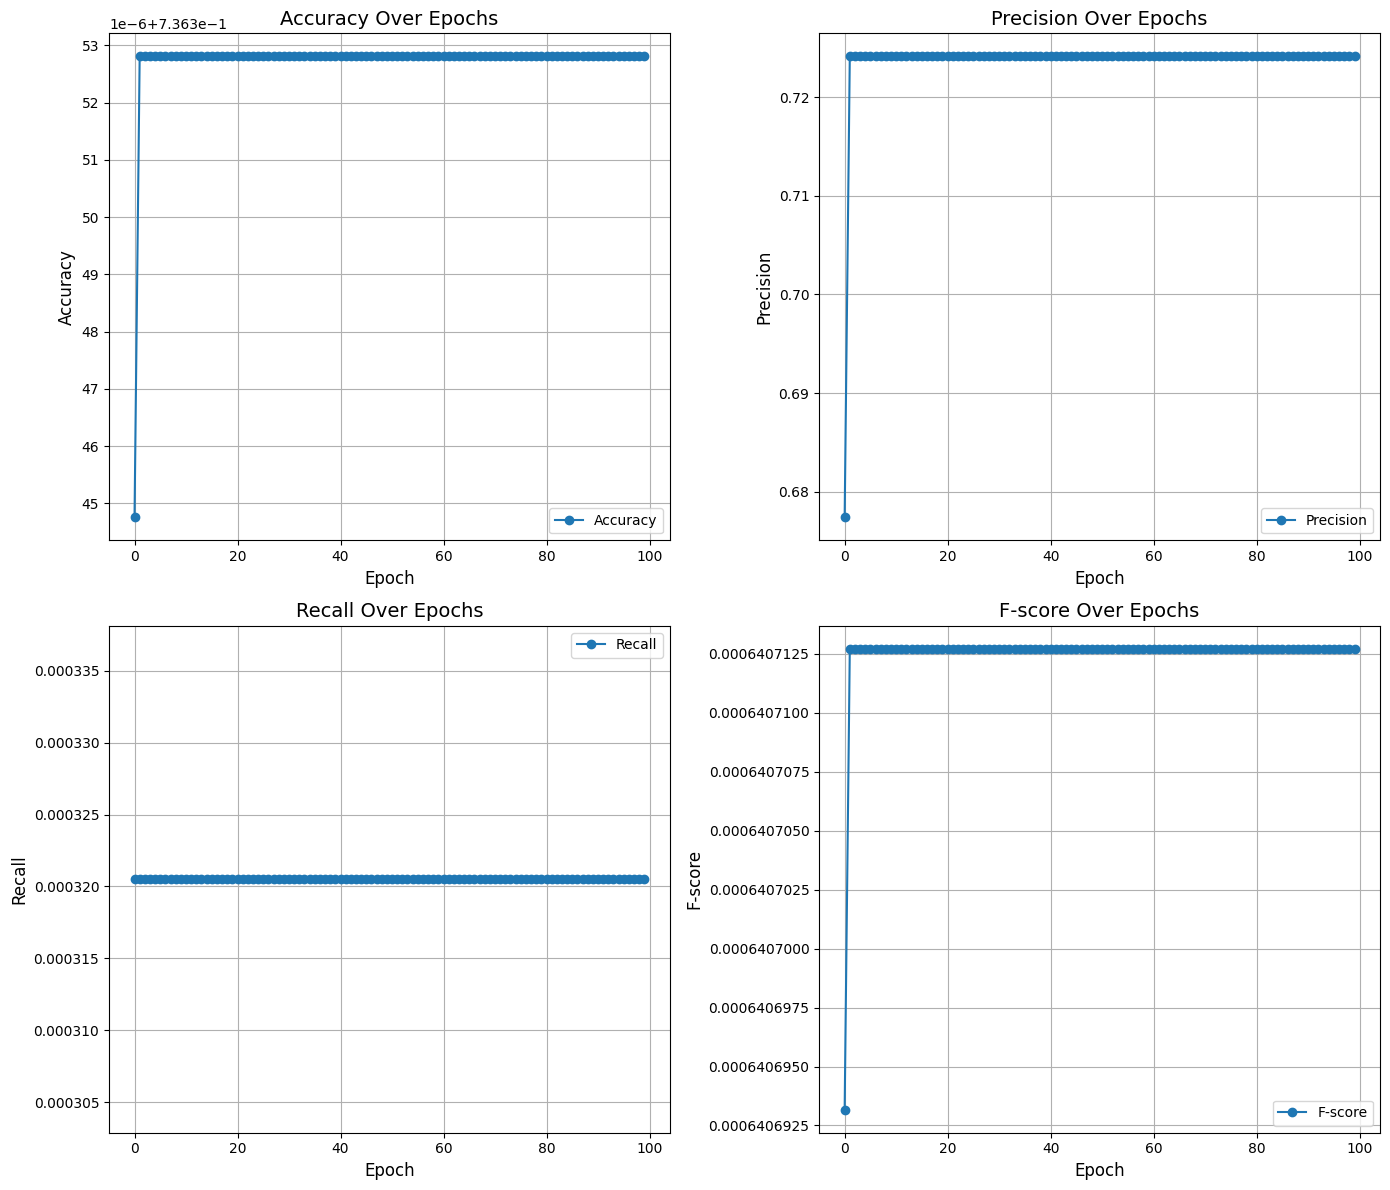

In [20]:

# О.4.2. и O.4.3

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Функция для разделения данных на тренировочную и тестовую выборки
def split_train_test(X, y, test_size=0.2):
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Функция для разделения данных на тренировочную, валидационную и тестовую выборки
def split_train_test_val(X, y, test_size=0.2, val_size=0.2):
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size + val_size, random_state=42, stratify=y
    )
    val_size_adjusted = val_size / (test_size + val_size)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=1 - val_size_adjusted, random_state=42, stratify=y_temp
    )
    return X_train, X_val, X_test, y_train, y_val, y_test

# Функция активации (сигмоида)
def sigmoid(x):
    # Ограничение значений для предотвращения переполнения
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))


# Производная сигмоиды
def sigmoid_derivative(sigmoid_value):
    return sigmoid_value * (1 - sigmoid_value)

# Функция для обучения модели
def train_model(X_train, y_train, epochs=100, learning_rate=0.1):
    vector_w = np.random.uniform(-0.01, 0.01, X_train.shape[1])  # Инициализация весов
    bias = 1.0
    results = []

    for epoch in range(epochs):
        labels = []
        for i in range(len(X_train)):
            temp = np.dot(X_train[i], vector_w) + bias
            predicted_output = sigmoid(temp)
            predicted_label = 1 if predicted_output >= 0.5 else 0
            labels.append(predicted_label)

            # Ошибка
            error = y_train[i] - predicted_output
            gradient = error * sigmoid_derivative(predicted_output)
            vector_w += learning_rate * gradient * X_train[i]

        # Метрики текущей эпохи
        accuracy = accuracy_score(y_train, labels)
        precision = precision_score(y_train, labels)
        recall = recall_score(y_train, labels)
        Fscore = f1_score(y_train, labels)

        results.append({
            'Epoch': epoch,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'Fscore': Fscore
        })

        # Сохраняем результаты в файл
        with open('epoh2.txt', 'a') as f:
            f.write(f'Эпоха {epoch} ------------------------------------\n')
            f.write(f'accuracy = {accuracy:.4f}\n')
            f.write(f'precision = {precision:.4f}\n')
            f.write(f'recall = {recall:.4f}\n')
            f.write(f'Fscore = {Fscore:.4f}\n\n')

    return vector_w, results

def plot_metrics(results):
    epochs = [result['Epoch'] for result in results]
    metrics = {
        'Accuracy': [result['Accuracy'] for result in results],
        'Precision': [result['Precision'] for result in results],
        'Recall': [result['Recall'] for result in results],
        'F-score': [result['Fscore'] for result in results],
    }

    plt.figure(figsize=(14, 12))

    for i, (metric_name, metric_values) in enumerate(metrics.items(), 1):
        plt.subplot(2, 2, i)  # Сетка 2x2 для 4 графиков
        plt.plot(epochs, metric_values, label=metric_name, marker='o')
        plt.title(f'{metric_name} Over Epochs', fontsize=14)
        plt.xlabel('Epoch', fontsize=12)
        plt.ylabel(metric_name, fontsize=12)
        plt.grid(True)
        plt.legend(fontsize=10)

    plt.tight_layout()  # Подгонка расстояний между графиками
    plt.show()

# Функция для вычисления метрик
def calculate_metrics(X, y, vector_w, bias=1.0):
    labels = []
    for nums in X:
        temp = np.dot(nums, vector_w) + bias
        predicted_label = 1 if sigmoid(temp) >= 0.5 else 0
        labels.append(predicted_label)

    accuracy = accuracy_score(y, labels)
    precision = precision_score(y, labels)
    recall = recall_score(y, labels)
    Fscore = f1_score(y, labels)
    return accuracy, precision, recall, Fscore

# Чтение данных
df = pd.read_csv('../september/result/september.csv')

# Преобразование столбца text в числовой массив
array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str):
        try:
            text_values = list(map(int, text_value.split()))
            length = min(len(text_values), 10)
            array[i, :length] = text_values[:length]
        except ValueError:
            continue

# Преобразование столбца emotion_scores в вектор меток
vector_accuracy = []
for i in range(len(df)):
    try:
        text_values = df.loc[i, 'emotion_scores'].strip('[]').split()
        if text_values:
            first_emotion_score = float(text_values[6])
            vector_accuracy.append(1 if first_emotion_score >= 0.3 else 0)
    except (ValueError, AttributeError):
        vector_accuracy.append(0)

X = array  # Признаки
y = np.array(vector_accuracy)  # Метки

# Деление данных
X_train, X_val, X_test, y_train, y_val, y_test = split_train_test_val(X, y)

# Обучение модели
vector_w, results = train_model(X_train, y_train, epochs=100, learning_rate=0.1)

# Оценка на тестовой выборке
accuracy_test, precision_test, recall_test, Fscore_test = calculate_metrics(X_test, y_test, vector_w)
print(f'Test metrics: Accuracy={accuracy_test:.4f}, Precision={precision_test:.4f}, Recall={recall_test:.4f}, Fscore={Fscore_test:.4f}')

# Оценка на валидационной выборке
accuracy_val, precision_val, recall_val, Fscore_val = calculate_metrics(X_val, y_val, vector_w)
print(f'Validation metrics: Accuracy={accuracy_val:.4f}, Precision={precision_val:.4f}, Recall={recall_val:.4f}, Fscore={Fscore_val:.4f}')

# Сохранение результатов обучения в CSV
results_df = pd.DataFrame(results)
results_df.to_csv('training_results.csv', index=False)

plot_metrics(results)
